# Lecture 2 - Neural Classifiers

provided by [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a></li>
    <li>2. <a href="#2.-Skip-Gram-With-Negative-Sampling">Skip-Gram With Negative Sampling</a></li>
    <li>3. <a href="#3.-Co-occurrence-Vectors">Co-occurrence Vectors</a></li>
    <li>4. <a href="#4.-GloVe">GloVe</a></li>
    <li>5. <a href="#4.-Evaluating-Word-Vectors">Evaluating Word Vectors</a></li>
    <li>6. <a href="#6.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

Word2vec is a framework for learning embedding vectors. There are also variants of this framework. 

* __Skip-grams (SG)__ predicts context words based on center word (this is word2vec)
* __Continuous Bag of Words (CBOW)__ predicts the center word from context words

# 2. Skip-Gram With Negative Sampling

$$
P(o ~|~ c) = \frac{exp(u_{o}^T v_c)}{\sum_{w \in V} exp(u_{w}^T v_c)}
$$

Consider the above equation in the previous lecture. It iterates through all the words in the vocabulary in the denominator. This is infeasible. So instead, we sample a $k$ subset of negative pairs/samples. The rewritten objective function is:

$$
J_{t}(\theta) = log \sigma (u_{o}^{T} v_{c}) + \sum_{i = 1}^{k} \mathbb{E}_{j \sim P(w)} [log \sigma (-u_{j}^{T}v_{c})] \hspace{1em} (Eq.~1)\\
$$

This objective function maximizes the probability that real context word appears for a given center word and minimizes the probability that random context words appear around a given center word.

The negative words are sampled such that less frequent words are sampled more often.

# 3. Co-occurrence Vectors

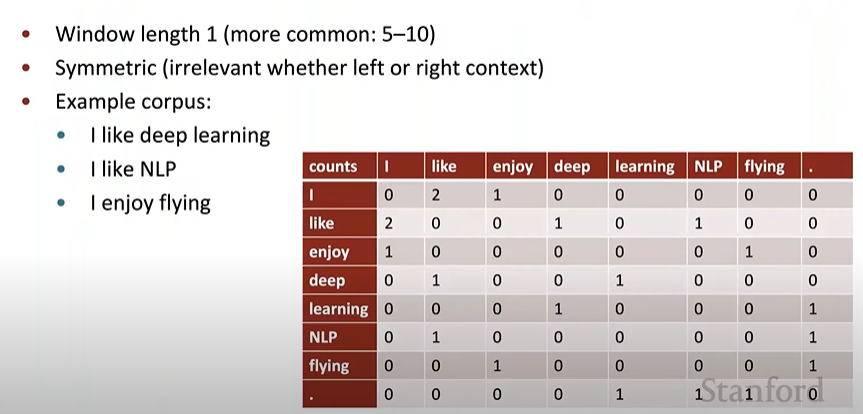 <br>
_Figure 1. Co-Occurrence Matrix._

This is a way of modeling the relationships between words. There are 2 ways to make a co-occurrence matrix:
* using a sliding window over a corpus of text 
* using the entire document 
    * this way is great at capturing general topics in the document (global context)
    
However, there are pros and cons with this framework. These matrices tend to be sparse, random, and take up a lot of space, and have high dimensionality. 

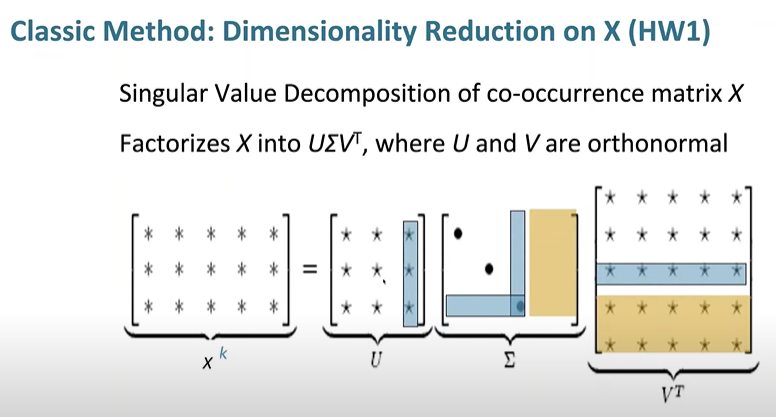 <br>
_Figure 2. Reducing the dimensionality of co-occurrence matrices via SVD._

SVD on raw counts doesn't work well. A paper called __COALS__ scales the counts in the cells. This can be done through applying log, using a min() function, and ignoring function words (words that aren't that useful). Can also use pearson correlations.

# 4. GloVe

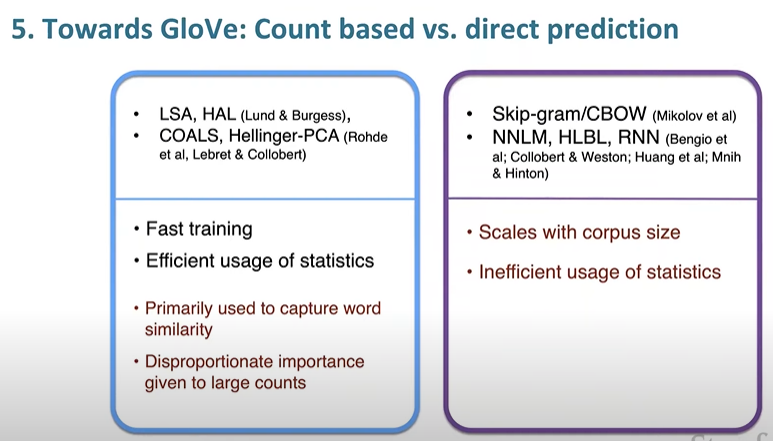 <br>
_Figure 3. Count-based vs direct prediction._

GloVe combines the predictive modeling that is in the purple box with the methods for word similarity in the blue box. It also has an additional feature: encoding meaning components in vector differences.

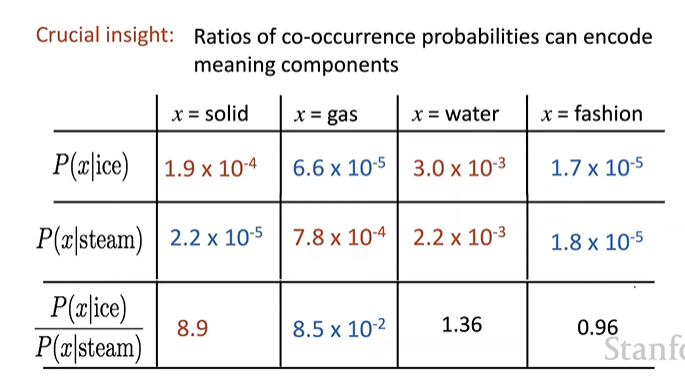 <br>
_Figure 4. Encoding meaning in vector differences._

To create an objective function from this idea, we see that a __log-bilinear model__ can be used to capture the ratio of co-occurrence probabilities.

$$
w_i ~ \cdot ~ w_j = log P(i~|~j)\\
w_x ~ \cdot (w_a - w_b) =log \frac{P(x~|~a)}{P(x~|~b)}\\
$$

__GloVe__ uses the following objective function:

$$
J = \sum_{i, j = 1}^{V} f(X_{ij})(\underbrace{w_i^T \tilde{w}_j + b_i + \tilde{b}_j}_{pred} - \underbrace{log X_{ij}}_{label})^2 \hspace{1em} (Eq.~2)\\
$$

$w_i$ and $w_j$ are embedding vectors for the $i$-th and $j$-th words. They also have their corresponding bias terms. This objective function can directly optimize on the ground truth co-occurrence matrix $X$. The function $f(X_{ij})$ is shown below. Its purpose is to limit the frequency of very frequent words.

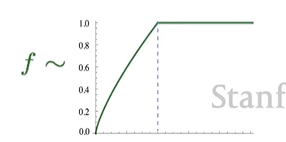 <br>
_Figure 5. F function in GloVe._

# 5. Evaluating Word Vectors

There are 2 ways to evaluate word vectors:
* __intrinsic__
    * evaluate on intermediate or subtask of the trained embeddings
* __extrinsic__
    * evaluate on a real task
    * can potentially show that the trained embeddings are really good/better
    * hard to source the error/shortcomings if embeddings fail
    
For intrinsic word vector evaluation, you can evaluate it like: woman - man + king = queen.

$$
d = \underset{i}{argmax} \frac{(x_b - x_a + x_c)^T x_i}{||x_b - x_a + x_c||} \hspace{1em} (Eq.~3)\\
$$

In GloVe, they found a dimension parameter of 300 was good with more data leading to better results.

There are shortcomings to GloVe. For one, many words have multiple meanings. Sarcasm and other things like mood and tone are harder to pick up.

One idea is to have multiple sensor vectors for all the definitions of a word. Though in practice it is often enough to just have 1 embedding vector per word as it is a weighted sum (or linear superposition) of all the definitions of that word. Because of _sparse encoding_ (high-dimensional embedding dimension), we can actually separate out the senses.

# 6. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)
- [Course Website](http://web.stanford.edu/class/cs224n/)

This is a series of 23 lectures provided by Stanford.
